In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sb

In [2]:
filename = "EMRIs/SG/alpha_0.01/EMRIs_G23_1g.txt"

In [3]:
with open(filename) as f:
    lines = f.readlines()

header_end = lines.index("Data:\n") + 1
print(header_end)

data = pd.read_csv(filename, delimiter=" ", skiprows=header_end)

11


In [4]:
data.columns = [col.strip().replace(",", "") for col in data.columns]
data.keys()

Index(['logMBH/Msun', 'm1/Msun', 'r0/Rs', 'chi_eff', 'T/Myr', 't_gw/Myr',
       't_migr/Myr', 'is_emri', 'Ng', 'Unnamed: 9'],
      dtype='object')

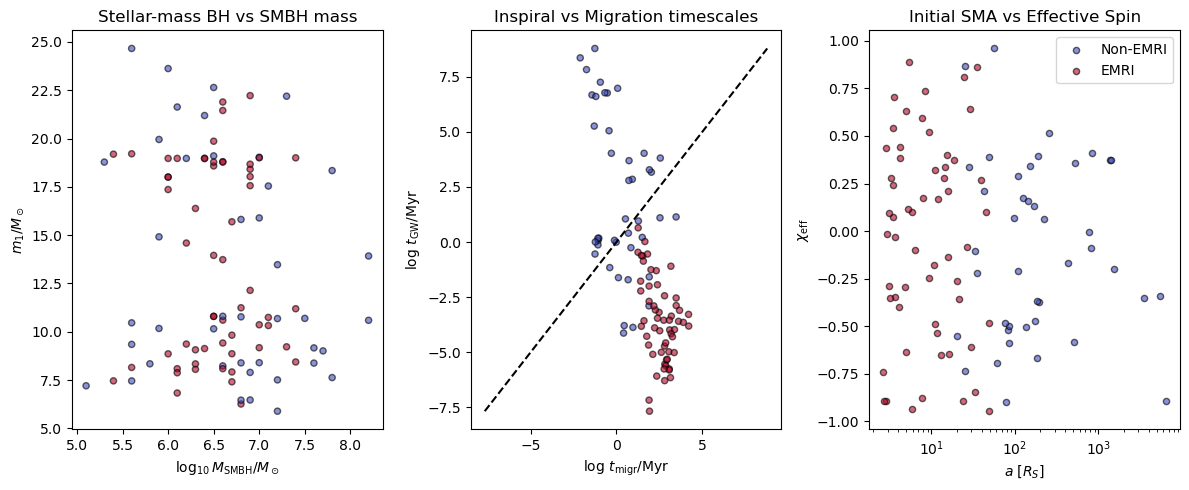

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), dpi=100)

i=0
sc1 = axs[i].scatter(data["logMBH/Msun"], data["m1/Msun"], c=data["is_emri"], cmap='coolwarm', alpha=0.6, edgecolor='k', s=20)
axs[i].set_xlabel(r'$\log_{10} M_{\rm SMBH} / M_\odot$')
axs[i].set_ylabel(r'$m_1 / M_\odot$')
axs[i].set_title('Stellar-mass BH vs SMBH mass')

i=1
t_migr = np.log10(data["t_migr/Myr"])
t_gw = np.log10(data["t_gw/Myr"])
sc2 = axs[i].scatter(t_migr, t_gw, c=data["is_emri"], cmap='coolwarm', alpha=0.6, edgecolor='k', s=20)
axs[i].plot([min(t_gw.min(), t_migr.min()), max(t_gw.max(), t_migr.max())],
            [min(t_gw.min(), t_migr.min()), max(t_gw.max(), t_migr.max())],
            'k--', label=r'$t_{\rm GW} = t_{\rm migr}$')

axs[i].set_xlabel(r'log $t_{\rm migr}$/Myr')
axs[i].set_ylabel(r'log $t_{\rm GW}$/Myr')
axs[i].set_title('Inspiral vs Migration timescales')

i=2
cmap = plt.colormaps['coolwarm']
colors_map = {0: cmap(0.), 1: cmap(1.)}
for label, group in data.groupby("is_emri"):
    axs[i].scatter(group["r0/Rs"], group["chi_eff"], color=colors_map[label],
                   label="EMRI" if label else "Non-EMRI",
                   s=20, alpha=0.6, edgecolor="k")
axs[i].set_xlabel(r'$a$ [$R_S$]')
axs[i].set_xscale('log')
axs[i].set_ylabel(r'$\chi_{\rm eff}$')
axs[i].set_title('Initial SMA vs Effective Spin')
axs[i].legend()

plt.tight_layout()
plt.savefig('EMRIs/summary.pdf')
plt.show()

In [6]:
# Function to make 1 scatter + marginal histograms
def plot_with_marginals(fig, data, x, y, is_emri, xlabel, ylabel, title, logx=False, logy=False):
    g = sb.jointplot(
        data=data,
        x=x, y=y,
        hue=is_emri,
        palette={0: "cornflowerblue", 1: "crimson"},
        alpha=0.6
    )

    g.figure.suptitle(title, y=1.02)
    g.set_axis_labels(xlabel, ylabel)

    if logx:
        g.ax_joint.set_xscale('log')
        g.ax_marg_x.set_xscale('log')
    if logy:
        g.ax_joint.set_yscale('log')
        g.ax_marg_y.set_yscale('log')




<Figure size 600x600 with 0 Axes>

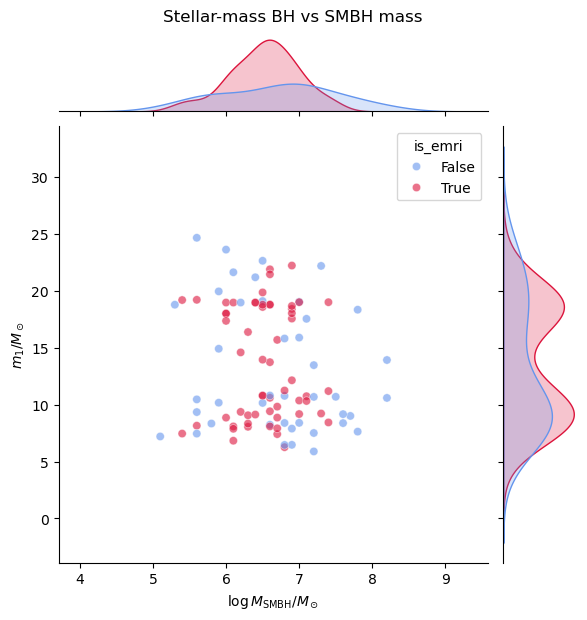

In [7]:
fig = plt.figure(figsize=(6, 6))

# Plot 1: m1 vs logMBH
plot_with_marginals(
    fig, data,
    x="logMBH/Msun",
    y="m1/Msun",
    is_emri="is_emri",
    xlabel=r'$\log M_{\rm SMBH} / M_\odot$',
    ylabel=r'$m_1 / M_\odot$',
    title='Stellar-mass BH vs SMBH mass'
)

fig.tight_layout()
plt.savefig('EMRIs/masses.pdf')
plt.show()

<Figure size 600x600 with 0 Axes>

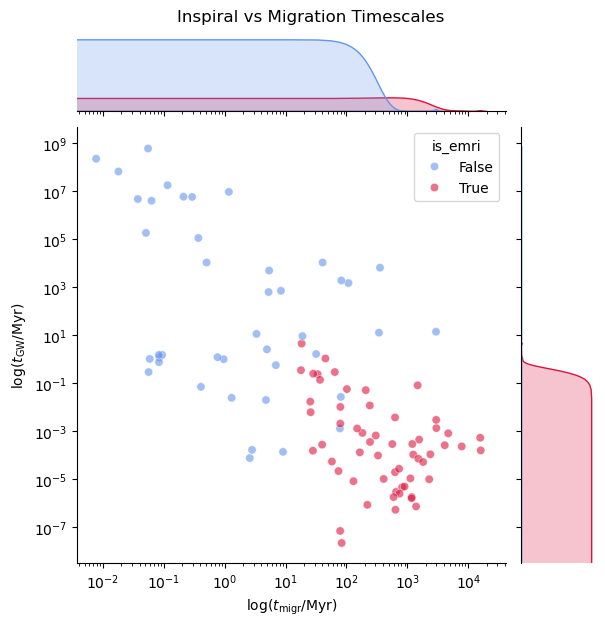

In [8]:
fig = plt.figure(figsize=(6, 6))

# Plot 2: log t_migr vs log t_gw
plot_with_marginals(
    fig, data,
    x="t_migr/Myr",
    y="t_gw/Myr",
    is_emri="is_emri",
    xlabel=r'$\log (t_{\rm migr} / \mathrm{Myr})$',
    ylabel=r'$\log (t_{\rm GW} / \mathrm{Myr})$',
    title='Inspiral vs Migration Timescales',
    logx=True,
    logy=True
)


fig.tight_layout()
plt.savefig('EMRIs/timescales.pdf')
plt.show()

<Figure size 600x600 with 0 Axes>

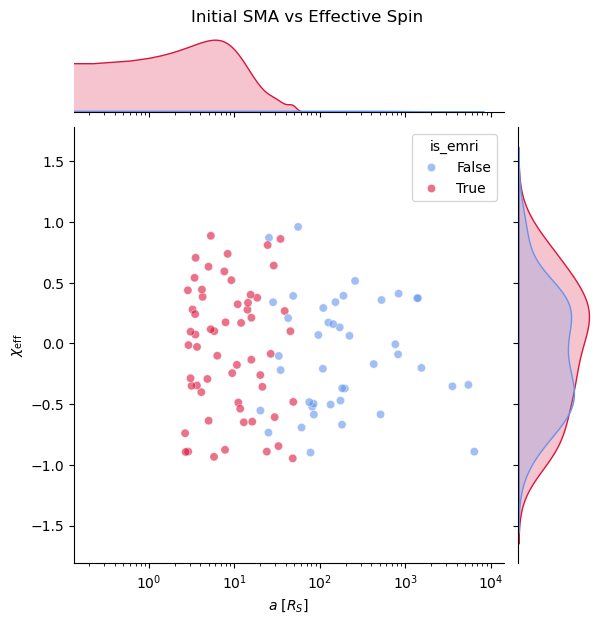

In [9]:
fig = plt.figure(figsize=(6, 6))

# Plot 3: r0 vs chi_eff
plot_with_marginals(
    fig, data,
    x="r0/Rs",
    y="chi_eff",
    is_emri="is_emri",
    xlabel=r'$a$ [$R_S$]',
    ylabel=r'$\chi_{\rm eff}$',
    title='Initial SMA vs Effective Spin',
    logx=True,
    logy=False
)


fig.tight_layout()
plt.savefig('EMRIs/sma_chieff.pdf')
plt.show()